In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from random import shuffle

# Society simulations

### RAM

*3 types of agent: low c = 0.05, medium c = 0.1, high c = 0.15; price is the highest possible in this society p = 0.35*

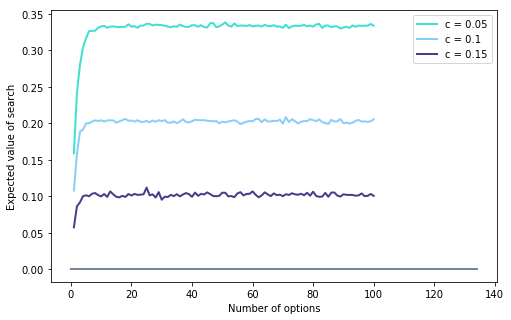

In [10]:
# Expected value simulations 

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.35
c_list = [0.05, 0.1, 0.15] 

list_of_values_lists = [] 

for c in c_list:
    x_r = 1 - math.sqrt(2*c)
    values_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))


            period = 0 
            for x in agent_x_list:
                
                period += 1
                
                if period < n:
                    if x >= x_r:
                        x_best = x
                        value = x_best - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= p:
                        value = x_best - p - c*period
                    if x_best < p:
                        value =  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)
    list_of_values_lists.append(values_list)  
    
    
plt.figure(figsize=(8,5))

plt.plot(n_list, list_of_values_lists[0], color = 'turquoise', label = 'c = 0.05', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'lightskyblue', label = 'c = 0.1', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'darkslateblue', label = 'c = 0.15', linewidth = 2)
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


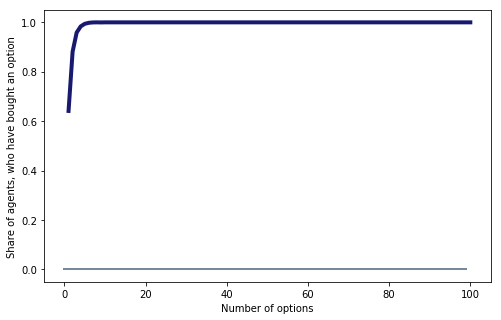

In [11]:
# Society share simulations 


rates_list = []

for n in n_list:

    markers_counter = 0
    
    for i in range(3):
        
        c = c_list[i]
        x_r = 1 - math.sqrt(2*c)
        
        if list_of_values_lists[i][n-1] >= 0:
            
            for agent in range(1, 3001):
                
                agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

                period = 0 
                
                for x in agent_x_list:
                    period += 1
                    if period < n:
                        
                        if x >= x_r:
                            markers_counter += 1
                            break

                    if period == n:
                        x_best = max(agent_x_list)
                        if x_best >= p:
                            markers_counter += 1
                            
                        if x_best < p:
                            markers_counter += 0
                            
                            
        if list_of_values_lists[i][n-1] < 0:
            markers_counter += 0               
    
    rate = markers_counter/9000
    rates_list.append(rate)

plt.figure(figsize=(8,5))

plt.plot(n_list, rates_list, color = 'midnightblue', linewidth = 4 ) 
plt.xlabel('Number of options')
plt.ylabel('Share of agents, who have bought an option')

plt.plot([0]*100, c  = 'lightslategrey', linewidth = 2)


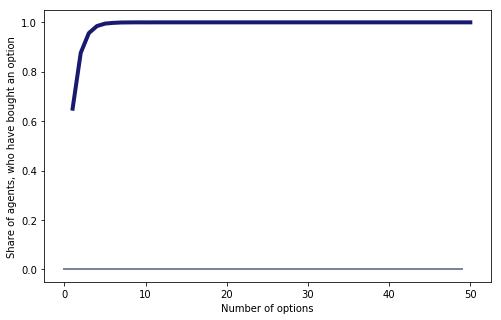

In [12]:
# society share simulation (for first 50 options)

rates_list = []
n_list_small = [i for i in range(1,51)]

for n in n_list_small:

    markers_counter = 0
    
    for i in range(3):
        
        c = c_list[i]
        x_r = 1 - math.sqrt(2*c)
        
        if list_of_values_lists[i][n-1] >= 0:
            
            for agent in range(1, 3001):
                
                agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

                period = 0 
                
                for x in agent_x_list:
                    period += 1
                    if period < n:
                        
                        if x >= x_r:
                            markers_counter += 1
                            break

                    if period == n:
                        x_best = max(agent_x_list)
                        if x_best >= p:
                            markers_counter += 1
                            
                        if x_best < p:
                            markers_counter += 0
                            
                            
        if list_of_values_lists[i][n-1] < 0:
            markers_counter += 0               
    
    rate = markers_counter/9000
    rates_list.append(rate)

plt.figure(figsize=(8,5))

plt.plot(n_list_small, rates_list, color = 'midnightblue', linewidth = 4 ) 
plt.xlabel('Number of options')
plt.ylabel('Share of agents, who have bought an option')

plt.plot([0]*50, c  = 'lightslategrey', linewidth = 2)


## Irrational agent model

*different agents: low c = 0.05, medium c = 0.1, high c = 0.15; beta is discretely uniformly distributed at [0.5;3.5];  price is the highest possible in this society p = 0.35*

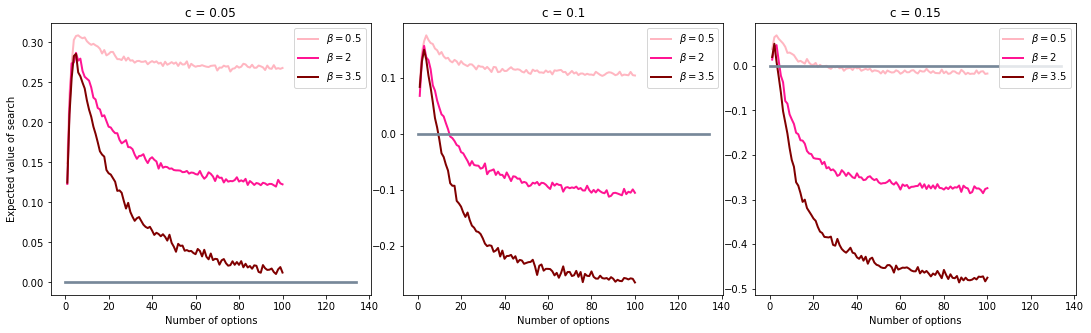

In [3]:
#Expected value simulations

agents_num = 10000
n_list = [i for i in range(1, 101)]


p = 0.35
c_list = [0.05, 0.1, 0.15]
b_list = [0.5, 0.8, 1.1, 1.4, 1.7, 2, 2.3, 2.6, 2.9, 3.2, 3.5]

list_of_values_lists = [] 

for c in c_list:
    for b in b_list:
        x_ir = 1 - math.sqrt((2*c)/(1+b))
        values_list = []
        for n in n_list:
            agents_values = []
            for agent in range(1, agents_num + 1):
                x_best = 0
                agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

                period = 0 
                for x in agent_x_list:
                    period += 1


                    if period < n:
                        if x >= x_ir:
                            x_best = x
                            value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                            break

                    if period == n:
                        x_best = max(agent_x_list)
                        if x_best >= (p/(1+b)):
                            value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        if x_best < (p/(1+b)):
                            value =  - ((n)/(n+1))*b  - c*period


                agents_values.append(value)
            mean_value = np.mean(agents_values)
            values_list.append(mean_value)
        list_of_values_lists.append(values_list)  

plt.figure(figsize=(16,5)) 

plt.subplot(131)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[5], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[10], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.plot([0]*135, c  = 'lightslategray', linewidth = 2.7)

plt.title('c = 0.05')
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')


plt.subplot(132)

plt.plot(n_list, list_of_values_lists[11], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[16], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[21], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.plot([0]*135, c  = 'lightslategray', linewidth = 2.7)

plt.title('c = 0.1')
plt.xlabel('Number of options')




plt.subplot(133)

plt.plot(n_list, list_of_values_lists[22], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[27], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[32], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.plot([0]*135, c  = 'lightslategray', linewidth = 2.7)

plt.title('c = 0.15')
plt.xlabel('Number of options')



plt.subplots_adjust(left  = 0.01, wspace = 0.1)


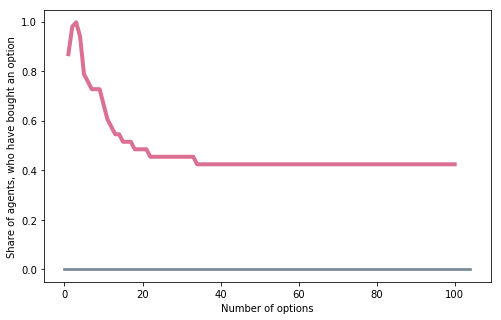

In [4]:
# Society share simulations 

n_list = [i for i in range(1,101)]
list_of_BC_lists = []

for i in range(0,3):
        for k in range(0,11):
            begining_condition_list = []
            for n in n_list:
                if list_of_values_lists[i*11 + k][n-1] >= 0:
                    begining_condition_list.append(1)
                if list_of_values_lists[i*11 + k][n-1] < 0:
                    break
            begining_condition_list = begining_condition_list + [0]*(100 - len(begining_condition_list))       
            list_of_BC_lists.append(begining_condition_list)

rates_list = []

for n in n_list:

    markers_counter = 0
    
    for i in range(0,3):
        for k in range(0,11):
            c = c_list[i]
            b = b_list[k]
            x_ir = 1 - math.sqrt((2*c)/(1+b))

            if list_of_BC_lists[i*11 + k][n-1] == 1:
                
                for agent in range(1, 1001):

                    agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

                    period = 0 

                    for x in agent_x_list:
                        period += 1
                        
                        if period < n:
                            if x >= x_ir:
                                markers_counter += 1
                                break

                        if period == n:
                            x_best = max(agent_x_list)
                            if x_best >= p/(1+b):
                                markers_counter += 1

                            if x_best < p/(1+b):
                                markers_counter += 0


            if list_of_BC_lists[i*11 + k][n-1] == 0:
                markers_counter += 0               

    rate = markers_counter/33000
    rates_list.append(rate)
    
plt.figure(figsize=(8,5))            
plt.plot(n_list, rates_list, color = 'palevioletred', linewidth = 4)
plt.xlabel('Number of options')
plt.ylabel('Share of agents, who have bought an option')

plt.plot([0]*105, c  = 'lightslategrey', linewidth = 2.7)


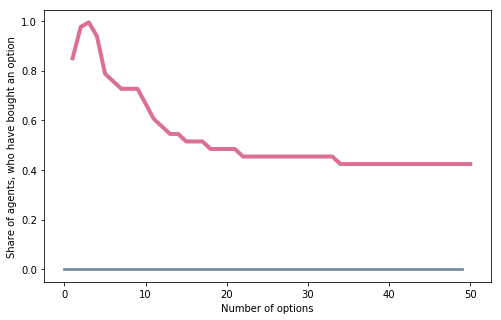

In [8]:
# society shares for first 50 options

rates_list = []

n_list_small = [i for i in range(1,51)]

for n in n_list_small:

    markers_counter = 0
    
    for i in range(0,3):
        for k in range(0,11):
            c = c_list[i]
            b = b_list[k]
            x_ir = 1 - math.sqrt((2*c)/(1+b))

            if list_of_BC_lists[i*11 + k][n-1] == 1:
                
                for agent in range(1, 1001):

                    agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

                    period = 0 

                    for x in agent_x_list:
                        period += 1
                        
                        if period < n:
                            if x >= x_ir:
                                markers_counter += 1
                                break

                        if period == n:
                            x_best = max(agent_x_list)
                            if x_best >= p/(1+b):
                                markers_counter += 1

                            if x_best < p/(1+b):
                                markers_counter += 0


            if list_of_BC_lists[i*11 + k][n-1] == 0:
                markers_counter += 0               

    rate = markers_counter/33000
    rates_list.append(rate)

plt.figure(figsize=(8,5))
plt.plot(n_list_small, rates_list, color = 'palevioletred', linewidth = 4)
plt.xlabel('Number of options')
plt.ylabel('Share of agents, who have bought an option')

plt.plot([0]*50, c  = 'lightslategrey', linewidth = 2.7)


## RAM ex simulations c = 0.1 and different prices

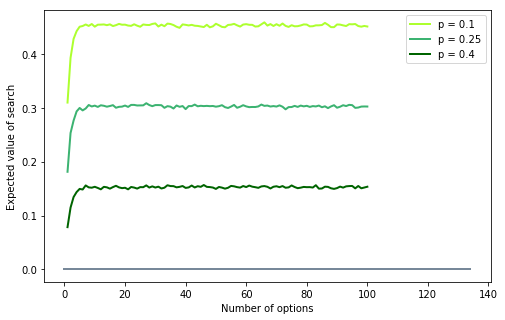

In [24]:
# Rational agent model c = 0.1 and different prices

agents_num = 10000
n_list = [i for i in range(1,101)]

c = 0.1
p_list = [0.1, 0.25, 0.4] 

list_of_values_lists = []


for p in p_list:
    x_r = 1 - math.sqrt(2*c)
    values_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))


            period = 0 
            for x in agent_x_list:
                
                period += 1
                
                if period < n:
                    if x >= x_r:
                        x_best = x
                        value = x_best - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= p:
                        value = x_best - p - c*period
                    if x_best < p:
                        value =  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)
    
    list_of_values_lists.append(values_list)  



plt.figure(figsize=(8,5))


plt.plot(n_list, list_of_values_lists[0], color = 'greenyellow', label = 'p = 0.1', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'mediumseagreen', label = 'p = 0.25', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'darkgreen', label = 'p = 0.4', linewidth = 2)
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


## BRAM ex simulations c = 0.1, beta = 2 and different prices

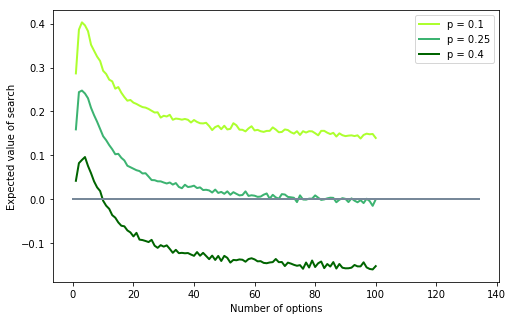

In [13]:
# Irrational agent model  c = 0.1, b = 2 and different p

agents_num = 10000
n_list = [i for i in range(1,101)]

b = 2
c = 0.1
p_list = [0.1, 0.25, 0.4]

list_of_values_lists = []

for p in p_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)


    list_of_values_lists.append(values_list)  


plt.figure(figsize=(8,5))


plt.plot(n_list, list_of_values_lists[0], color = 'greenyellow', label = 'p = 0.1', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'mediumseagreen', label = 'p = 0.25', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'darkgreen', label = 'p = 0.4', linewidth = 2)
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


## Grid of parameters for Appendix A

## RAM

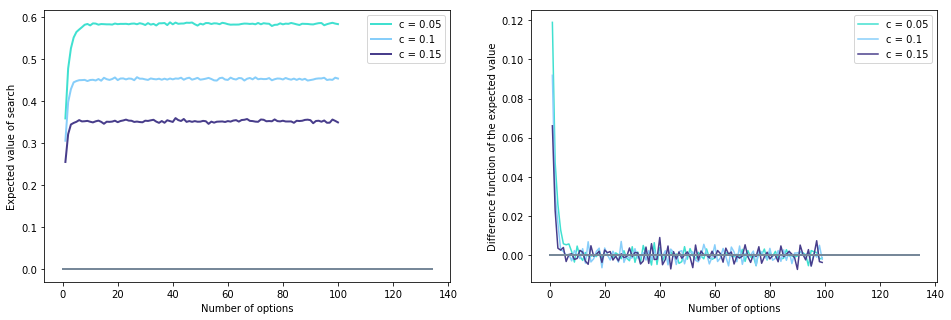

In [14]:
# Rational agent model (p = 0.1)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.1
c_list1 = [0.05, 0.1, 0.15] 

list_of_values_lists = []
list_of_derivatives_lists = []

for c in c_list1:
    x_r = 1 - math.sqrt(2*c)
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))


            period = 0 
            for x in agent_x_list:
                
                period += 1
                
                if period < n:
                    if x >= x_r:
                        x_best = x
                        value = x_best - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= p:
                        value = x_best - p - c*period
                    if x_best < p:
                        value =  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)
    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'turquoise', label = 'c = 0.05', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'lightskyblue', label = 'c = 0.1', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'darkslateblue', label = 'c = 0.15', linewidth = 2)
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'turquoise', label = 'c = 0.05')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'lightskyblue', label = 'c = 0.1')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'darkslateblue', label = 'c = 0.15')
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


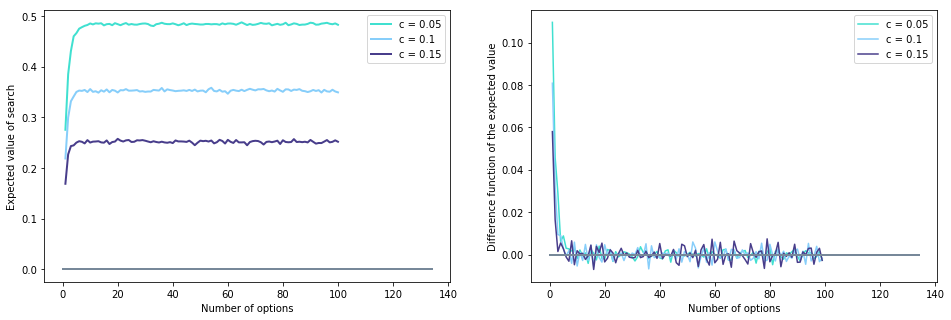

In [15]:
# Rational agent model (p = 0.2)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.2
c_list1 = [0.05, 0.1, 0.15] 

list_of_values_lists = []
list_of_derivatives_lists = []

for c in c_list1:
    x_r = 1 - math.sqrt(2*c)
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))


            period = 0 
            for x in agent_x_list:
                
                period += 1
                
                if period < n:
                    if x >= x_r:
                        x_best = x
                        value = x_best - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= p:
                        value = x_best - p - c*period
                    if x_best < p:
                        value =  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)
    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'turquoise', label = 'c = 0.05', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'lightskyblue', label = 'c = 0.1', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'darkslateblue', label = 'c = 0.15', linewidth = 2)
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'turquoise', label = 'c = 0.05')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'lightskyblue', label = 'c = 0.1')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'darkslateblue', label = 'c = 0.15')
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


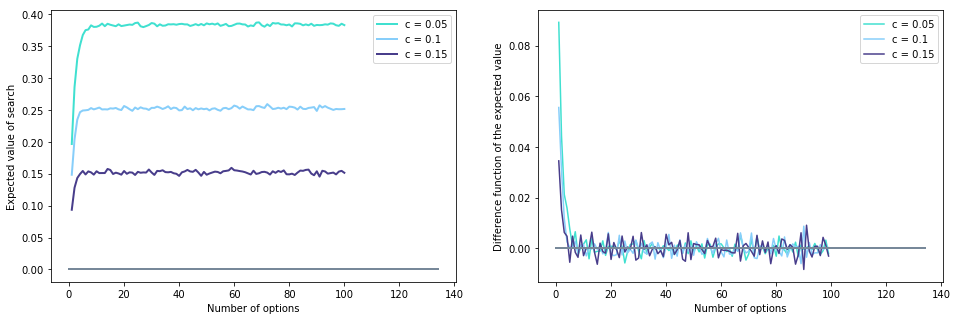

In [16]:
# Rational agent model (p = 0.3)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.3
c_list1 = [0.05, 0.1, 0.15] 

list_of_values_lists = []
list_of_derivatives_lists = []

for c in c_list1:
    x_r = 1 - math.sqrt(2*c)
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))


            period = 0 
            for x in agent_x_list:
                
                period += 1
                
                if period < n:
                    if x >= x_r:
                        x_best = x
                        value = x_best - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= p:
                        value = x_best - p - c*period
                    if x_best < p:
                        value =  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)
    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'turquoise', label = 'c = 0.05', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'lightskyblue', label = 'c = 0.1', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'darkslateblue', label = 'c = 0.15', linewidth = 2)
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'turquoise', label = 'c = 0.05')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'lightskyblue', label = 'c = 0.1')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'darkslateblue', label = 'c = 0.15')
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


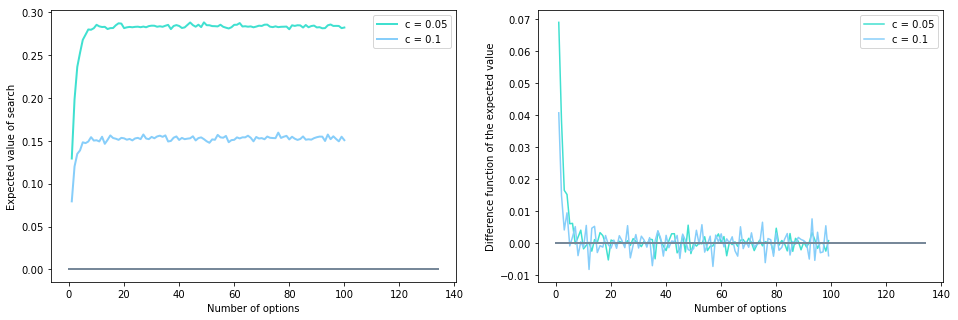

In [17]:
# Rational agent model (p = 0.4)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.4
c_list2 = [0.05, 0.1] 

list_of_values_lists = []
list_of_derivatives_lists = []

for c in c_list2:
    x_r = 1 - math.sqrt(2*c)
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))


            period = 0 
            for x in agent_x_list:
                
                period += 1
                
                if period < n:
                    if x >= x_r:
                        x_best = x
                        value = x_best - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= p:
                        value = x_best - p - c*period
                    if x_best < p:
                        value =  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)
    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'turquoise', label = 'c = 0.05', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'lightskyblue', label = 'c = 0.1', linewidth = 2)
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'turquoise', label = 'c = 0.05')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'lightskyblue', label = 'c = 0.1')
plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


## BRAM

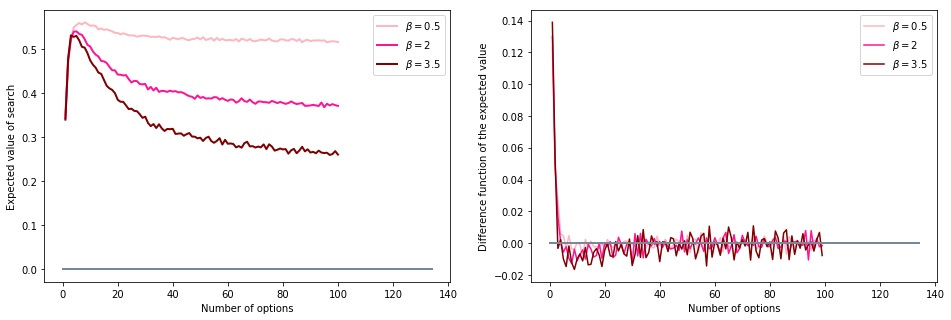

In [29]:
# Irrational agent model (p = 0.1, c = 0.05)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.1
c = 0.05
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


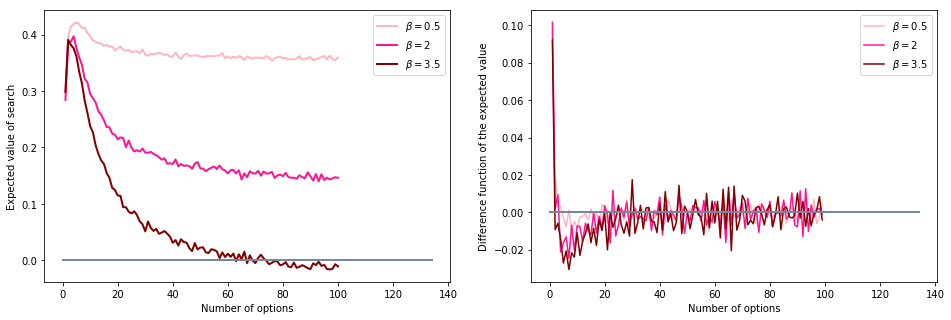

In [30]:
# Irrational agent model (p = 0.1, c = 0.1)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.1
c = 0.1
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


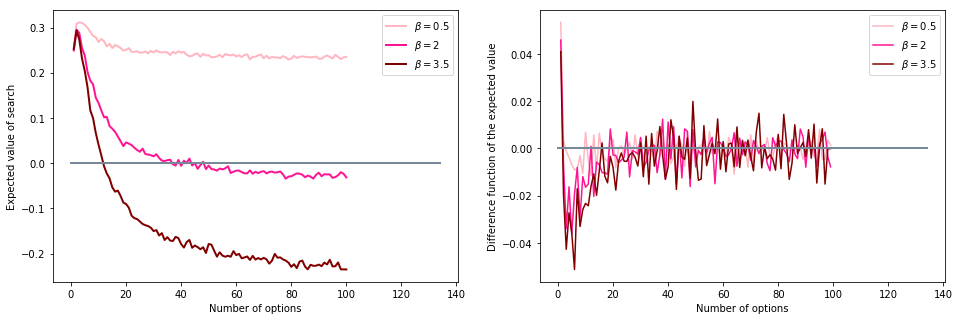

In [31]:
# Irrational agent model (p = 0.1, c = 0.15)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.1
c = 0.15
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


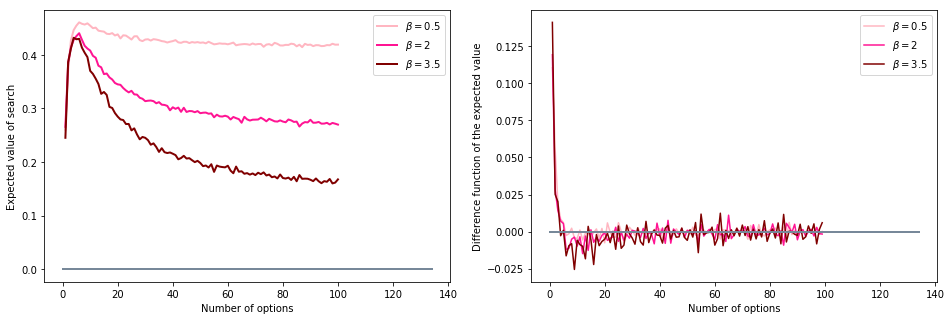

In [32]:
# Irrational agent model (p = 0.2, c = 0.05)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.2
c = 0.05
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


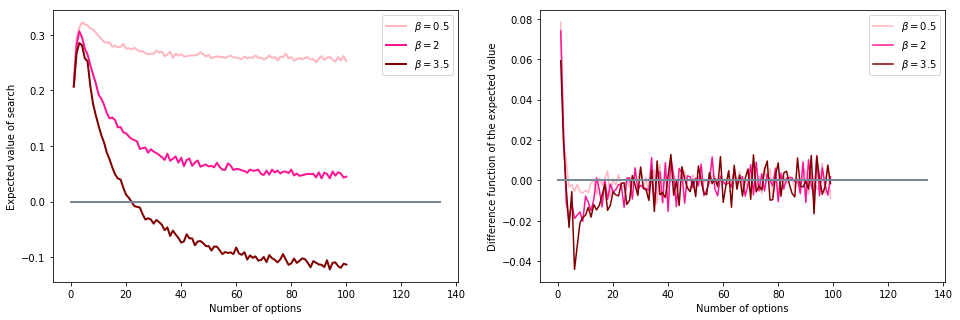

In [33]:
# Irrational agent model (p = 0.2, c = 0.1)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.2
c = 0.1
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


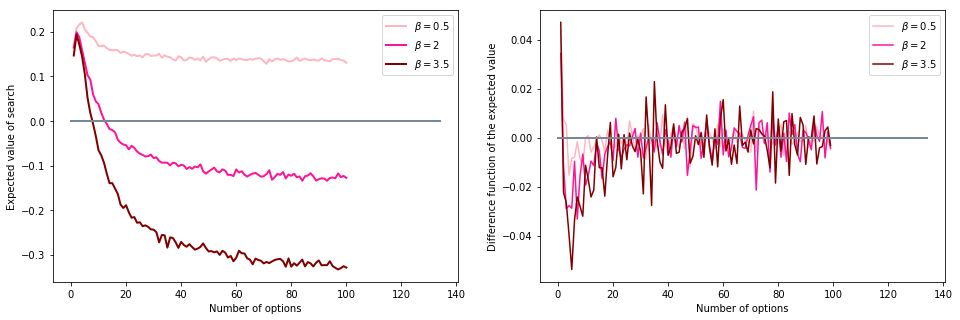

In [34]:
# Irrational agent model (p = 0.2, c = 0.15)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.2
c = 0.15
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


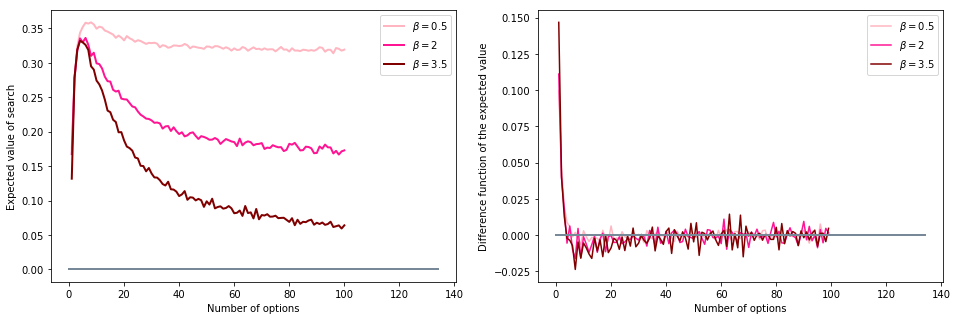

In [35]:
# Irrational agent model (p = 0.3, c = 0.05)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.3
c = 0.05
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


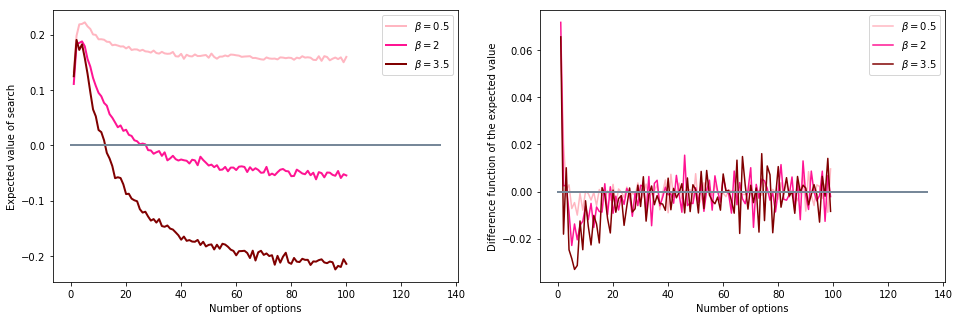

In [36]:
# Irrational agent model (p = 0.3, c = 0.1)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.3
c = 0.1
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


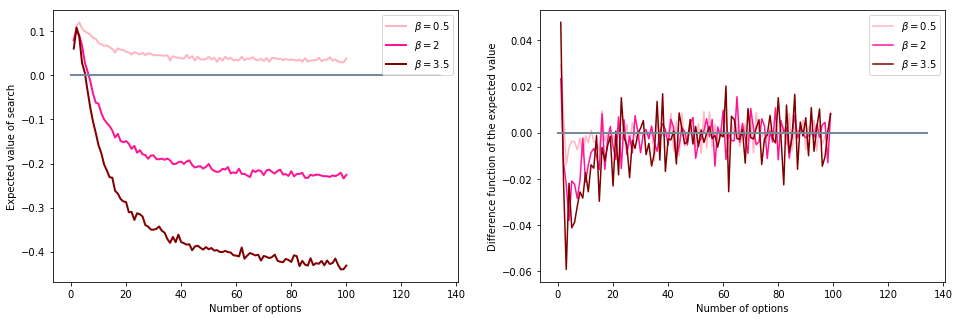

In [37]:
# Irrational agent model (p = 0.3, c = 0.15)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.3
c = 0.15
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


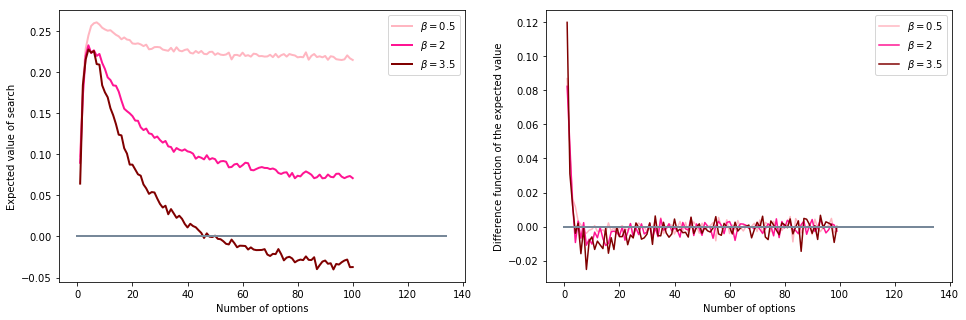

In [38]:
# Irrational agent model (p = 0.4, c = 0.05)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.4
c = 0.05
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


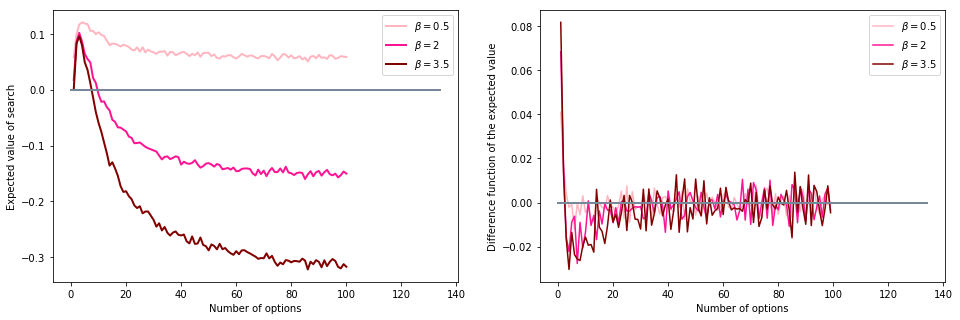

In [39]:
# Irrational agent model (p = 0.4, c = 0.1)

agents_num = 10000
n_list = [i for i in range(1,101)]

p = 0.4
c = 0.1
b_list = [0.5, 2, 3.5]

list_of_values_lists = []
list_of_derivatives_lists = []

for b in b_list:
    x_ir = 1 - math.sqrt((2*c)/(1+b))
    values_list = []
    derivatives_list = []
    for n in n_list:
        agents_values = []
        for agent in range(1, agents_num + 1):
            x_best = 0
            agent_x_list = list(np.random.uniform(low=0.0, high=1.0, size = n))

            period = 0 
            for x in agent_x_list:
                period += 1


                if period < n:
                    if x >= x_ir:
                        x_best = x
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                        break

                if period == n:
                    x_best = max(agent_x_list)
                    if x_best >= (p/(1+b)):
                        value = x_best*(1+b) - ((n)/(n+1))*b - p - c*period
                    if x_best < (p/(1+b)):
                        value =  - ((n)/(n+1))*b  - c*period


            agents_values.append(value)
        mean_value = np.mean(agents_values)
        values_list.append(mean_value)

    for i in range(1,100):
        der = values_list[i] - values_list[i-1]
        derivatives_list.append(der)
    
    list_of_values_lists.append(values_list)  
    list_of_derivatives_lists.append(derivatives_list)


plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(n_list, list_of_values_lists[0], color = 'lightpink', label = r'$\beta = 0.5$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[1], color = 'deeppink', label = r'$\beta = 2$', linewidth = 2)
plt.plot(n_list, list_of_values_lists[2], color = 'maroon', label = r'$\beta = 3.5$', linewidth = 2)

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Expected value of search')

plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)


plt.subplot(122)

plt.plot(n_list[:-1], list_of_derivatives_lists[0], color = 'lightpink', label = r'$\beta = 0.5$')
plt.plot(n_list[:-1], list_of_derivatives_lists[1], color = 'deeppink', label = r'$\beta = 2$')
plt.plot(n_list[:-1], list_of_derivatives_lists[2], color = 'maroon', label = r'$\beta = 3.5$')

plt.legend(loc = 1)
plt.xlabel('Number of options')
plt.ylabel('Difference function of the expected value')


plt.plot([0]*135, c  = 'lightslategrey', linewidth = 2)
